# Random Walks

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random

## 1D
Start at position 0. Take N steps, moving left or right uniformly at random for each step. The step size is uniformly random between min_step and max_step.

In [16]:
def random_walk(N):
    position = 0
    positions = [position]
    for j in range(N):
        if random.randint(0, 1) == 0:
            position += 1
        else:
            position -= 1

        positions.append(position)

    return positions

def k_random_walks(trials, N):
    end_points = list()
    for i in range(trials):
        trial = random_walk(N)
        end_points.append(trial[-1])
    return end_points

In [17]:
end_points = k_random_walks(10000, 10)
print('Mean:', np.mean(end_points))
print('Variance:', np.var(end_points, ddof=1))

Mean: 0.007
Variance: 10.0997609761


## Plotting One Walk

In [18]:
def plot_walk(positions):
    plt.plot(range(len(positions)), positions)
    plt.show()

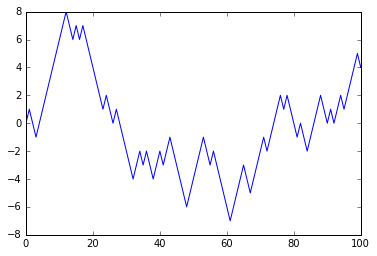

In [19]:
plot_walk(random_walk(100))

## Plotting the Distribution of End Points for k Walks

In [61]:
def plot_k_walks(end_points):    
    plt.hist(end_points, bins=len(set(end_points))*2+1)
    plt.show()

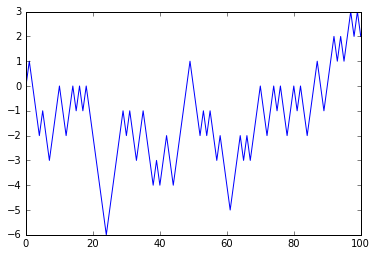

In [62]:
plot_walk(random_walk(100))

## Uncertainty vs Sample Size

In [44]:
def uncertainty(samples):
    return (np.var(samples, ddof=1) / len(samples))**0.5

end_points = k_random_walks(1000, 10)
print('Mean:', np.mean(end_points))
print('Uncertainty:', uncertainty(end_points))
print('Variance:', np.var(end_points, ddof=1))

Mean: 0.202
Uncertainty: 0.100624655633
Variance: 10.1253213213


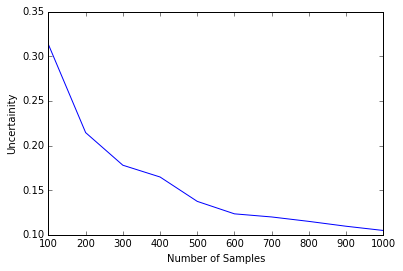

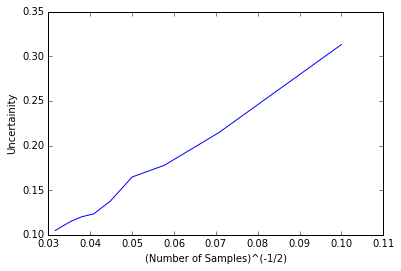

In [58]:
sample_sizes = []
uncertainties = []
for samples in range(100, 1001, 100):
    end_points = k_random_walks(samples, 10)
    sample_sizes.append(samples)
    uncertainties.append(uncertainty(end_points))
    
plt.plot(sample_sizes, uncertainties)
plt.ylabel('Uncertainity')
plt.xlabel('Number of Samples')
plt.show()

plt.plot(list(map(lambda x: x**-.5, sample_sizes)), uncertainties)
plt.ylabel('Uncertainity')
plt.xlabel('(Number of Samples)^(-1/2)')
plt.show()